## ScaleView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@465e45d7

This `Op` wraps the `Views.scale()` method of ImgLib2, enlarging the image by a set of scale factors. Let's see how the `Op` is called: through the use of an [interpolator](https://en.wikipedia.org/wiki/Interpolation) and an [`OutOfBoundsFactory`](http://javadoc.scijava.org/ImgLib2/net/imglib2/outofbounds/OutOfBoundsFactory.html). 

In [2]:
ij.op().help('scaleView')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.scaleView.DefaultScaleView(
		RandomAccessibleInterval in,
		double[] scaleFactors,
		InterpolatorFactory interpolator,
		OutOfBoundsFactory outOfBoundsFactory?)

Note that the `Op` takes the following parameters:
* `RandomAccessibleInterval in`: the input image
* `double[] scaleFactors`: an array an element for each dimension that describes the factor to which that dimension is to be increased by (i.e. a value of 2 implies that the corresponding dimension should be twice as large in the output)
* `InterpolatorFactory interpolator`: this Object tells the `Op` how to [interpolate](https://en.wikipedia.org/wiki/Interpolation) the spaces in between the known data points. There are many different types of [interpolation](http://javadoc.scijava.org/ImgLib2/) that are supported by ImageJ.
* `OutOfBoundsFactory outOfBoundsFactory`: an optonal parameter that tells the `Op` how to handle cases close to the edge of the image. Since this parameter is optional we won't worry about it here.

Let's find a really small image to scale up:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


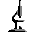

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/ij-icon.gif")

ij.notebook().display(input)

First, let's try scaling it using [nearest neighbor](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation) interpolation:

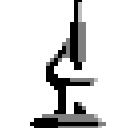

In [4]:
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory

scaleFactors = [4, 4, 1] // Enlarge X and Y by 4x; leave channel count the same.

scaled = ij.op().run("scaleView", input, scaleFactors, new NearestNeighborInterpolatorFactory())

ij.notebook().display(scaled)

Nice and pixel-y. If we want something smoother, we can try [N-Linear](https://en.wikipedia.org/wiki/Linear_interpolation) interpolation:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


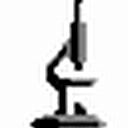

In [5]:
import net.imglib2.interpolation.randomaccess.LanczosInterpolatorFactory

scaleFactors = [4, 4, 1] // Enlarge X and Y by 4x; leave channel count the same.

input = ij.scifio().datasetIO().open("http://imagej.net/images/ij-icon.gif")

scaled = ij.op().run("scaleView", input, scaleFactors, new LanczosInterpolatorFactory())

ij.notebook().display(scaled)

Be sure to take a look at [`interpolateView`](interpolateView.ipynb), as it is somewhat related to our `scaleView` `Op`.